# Set up

In [11]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as D
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class generator(nn.Module):
    def __init__(self):
        super(generator,self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
    def forward(self,x):
        return self.main(x)
class disc_vanilla(nn.Module):
    def __init__(self):
        super(disc_vanilla, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
class disc_mixture(nn.Module):
    def __init__(self):
        super(disc_mixture, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 4)
        )

    def forward(self, input):
        return self.main(input)
class disc_wasserstein(nn.Module):
    def __init__(self):
        super(disc_wasserstein, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 1)
        )

    def forward(self, input):
        return self.main(input)


# Uni Mode

torch.Size([10000, 2])


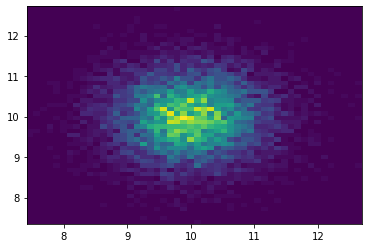

In [3]:
target = D.MultivariateNormal(torch.Tensor([10,10]),torch.Tensor([[0.5,0],[0,0.5]]))
samples = target.rsample(torch.Size([10000]))

print(samples.shape)
plt.hist2d(samples[:,0].numpy(),samples[:,1].numpy(),50)
plt.show()

In [4]:
from Code.gan import MixtureSimplexTrainTogether

In [5]:
Gen = generator()
Dis = disc_mixture()

batch_size = 128
lr = 0.0002
goptim = optim.Adam(Gen.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#
doptim = optim.Adam(Dis.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#

# Load data
train_loader = DataLoader(samples, batch_size=batch_size, shuffle=True)


train = MixtureSimplexTrainTogether(
    epochs          = 500,
    goptim          =goptim,
    doptim          =doptim,
    generator       = Gen, 
    discriminator   = Dis, 
    dataloader      = train_loader,
    latentdim       = (2,),

    disc_dimension  =4,   # paper = 9
    sigma_scale     =0.25 # paper

)

Optimization terminated successfully.
         Current function value: 2.424254
         Iterations: 74
         Function evaluations: 143


epoch: 20
[ 78 / 79 ]  Disc Loss:  6.28375244140625  Gen Loss:  -3.1924004554748535


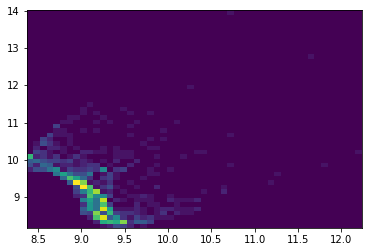

epoch: 40
[ 78 / 79 ]  Disc Loss:  6.195799827575684  Gen Loss:  -3.0662858486175537


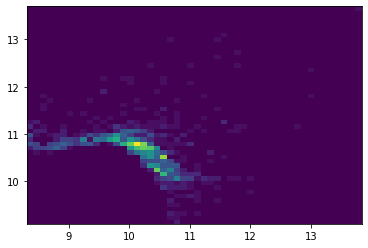

epoch: 60
[ 78 / 79 ]  Disc Loss:  6.235781192779541  Gen Loss:  -3.0172829627990723


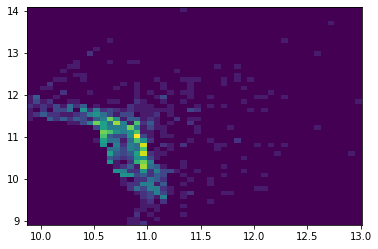

epoch: 80
[ 78 / 79 ]  Disc Loss:  6.250405311584473  Gen Loss:  -3.1466267108917236


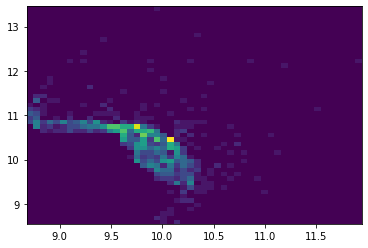

epoch: 100
[ 78 / 79 ]  Disc Loss:  6.235525131225586  Gen Loss:  -3.146775245666504


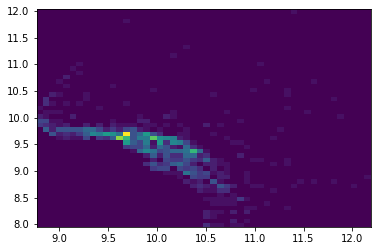

epoch: 120
[ 78 / 79 ]  Disc Loss:  6.239616870880127  Gen Loss:  -3.0979723930358887


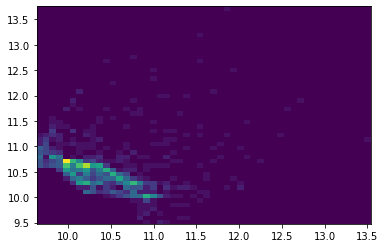

epoch: 140
[ 78 / 79 ]  Disc Loss:  6.223471164703369  Gen Loss:  -3.0976781845092773


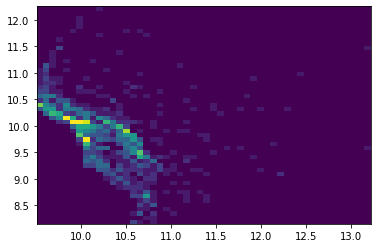

epoch: 160
[ 78 / 79 ]  Disc Loss:  6.216019153594971  Gen Loss:  -3.0950188636779785


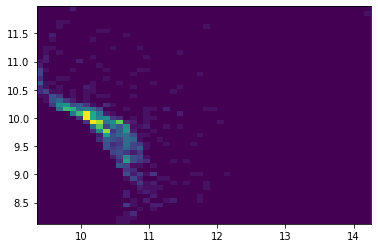

epoch: 180
[ 78 / 79 ]  Disc Loss:  6.268716335296631  Gen Loss:  -3.1447527408599854


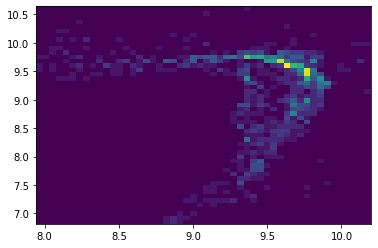

epoch: 200
[ 78 / 79 ]  Disc Loss:  6.208868980407715  Gen Loss:  -3.059314250946045


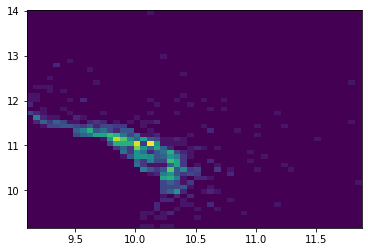

epoch: 220
[ 78 / 79 ]  Disc Loss:  6.232626914978027  Gen Loss:  -3.1462724208831787


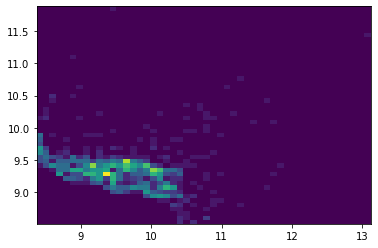

epoch: 240
[ 78 / 79 ]  Disc Loss:  6.238697052001953  Gen Loss:  -3.1327123641967773


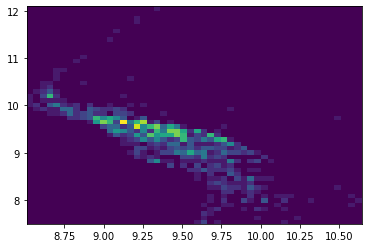

epoch: 260
[ 78 / 79 ]  Disc Loss:  6.226507186889648  Gen Loss:  -3.100821018218994


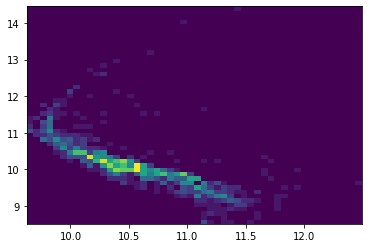

epoch: 280
[ 78 / 79 ]  Disc Loss:  6.230291366577148  Gen Loss:  -3.100409507751465


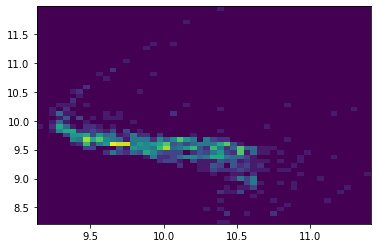

epoch: 300
[ 78 / 79 ]  Disc Loss:  6.254195213317871  Gen Loss:  -3.165353536605835


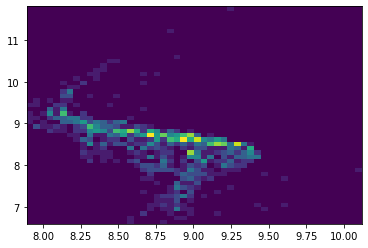

epoch: 320
[ 78 / 79 ]  Disc Loss:  6.240246772766113  Gen Loss:  -3.130058765411377


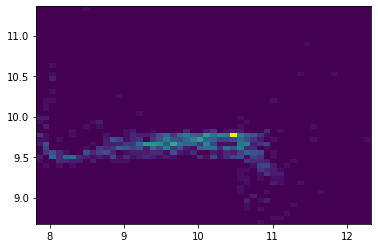

epoch: 340
[ 78 / 79 ]  Disc Loss:  6.2130913734436035  Gen Loss:  -3.1364009380340576


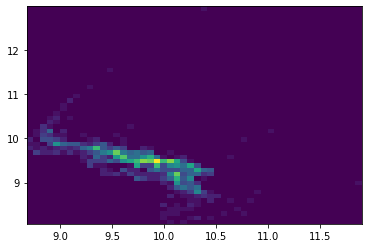

epoch: 360
[ 78 / 79 ]  Disc Loss:  6.2372236251831055  Gen Loss:  -3.117619276046753


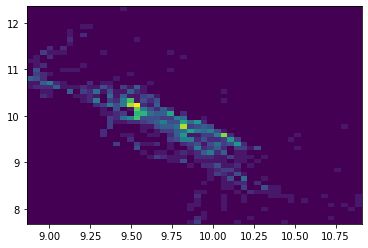

epoch: 380
[ 78 / 79 ]  Disc Loss:  6.265530586242676  Gen Loss:  -3.099825859069824


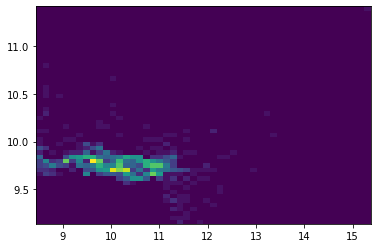

epoch: 400
[ 78 / 79 ]  Disc Loss:  6.235129356384277  Gen Loss:  -3.1229193210601807


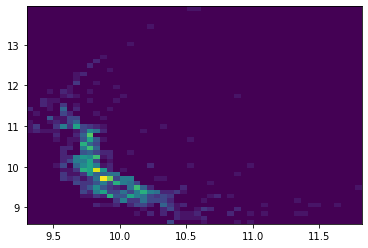

epoch: 420
[ 78 / 79 ]  Disc Loss:  6.2297773361206055  Gen Loss:  -3.1404004096984863


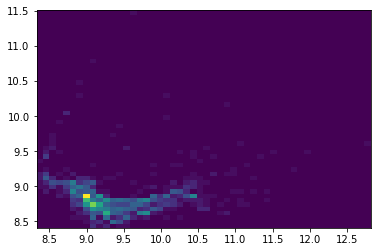

epoch: 440
[ 78 / 79 ]  Disc Loss:  6.226355075836182  Gen Loss:  -3.1441993713378906


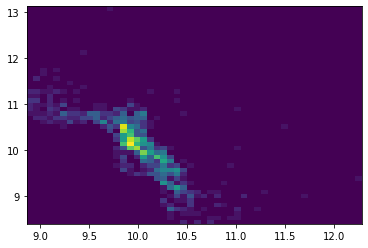

epoch: 460
[ 78 / 79 ]  Disc Loss:  6.23832893371582  Gen Loss:  -3.1190624237060547


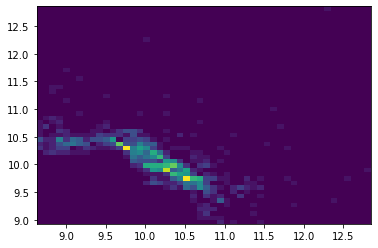

epoch: 480
[ 78 / 79 ]  Disc Loss:  6.2536301612854  Gen Loss:  -3.0976548194885254


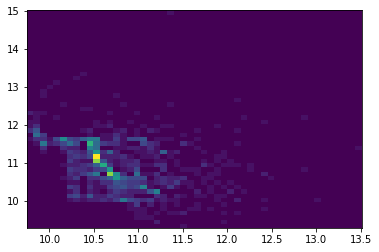

epoch: 500
[ 78 / 79 ]  Disc Loss:  6.223541259765625  Gen Loss:  -3.0989596843719482


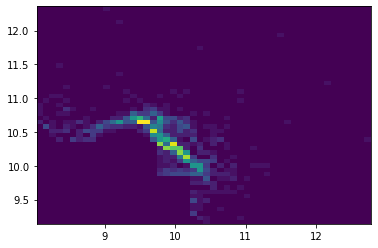

In [6]:
train.train()

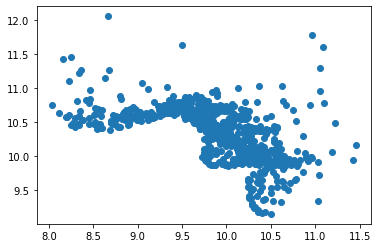

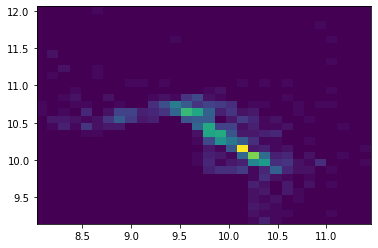

In [7]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
latent_sample = torch.randn(1000,2).to(device)
fake = Gen(latent_sample).detach().cpu().numpy()
plt.scatter(fake[:,0],fake[:,1])
plt.show()
plt.hist2d(fake[:,0],fake[:,1],bins=30)
plt.show()

# 2 Mode
## log
* failed to discover both mode for 
```
mu = torch.Tensor(
    [[10,10],
     [-10,-10]]
)
sigma = torch.Tensor(
    [[[0.5, 0.  ],
      [0.  , 0.5]],
     [[0.5, 0.  ],
      [0.  , 0.5]]]
)
```

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


torch.Size([10000, 2])


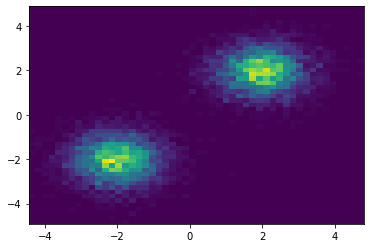

In [17]:
mu = torch.Tensor(
    [[2,2],
     [-2,-2]]
)
sigma = torch.Tensor(
    [[[0.5, 0.  ],
      [0.  , 0.5]],
     [[0.5, 0.  ],
      [0.  , 0.5]]]
)

gaus = D.Independent(D.MultivariateNormal(mu,sigma),0)
c_weight = D.Categorical(torch.tensor(torch.ones(2)))
target = gausMixture = D.MixtureSameFamily(c_weight,gaus)

samples = torch.zeros(10000,2)#target.rsample(torch.Size([10000]))
for i in range(10000):
    samples[i] = target.sample()

print(samples.shape)
plt.hist2d(samples[:,0].numpy(),samples[:,1].numpy(),50)
plt.show()

In [18]:
Gen = generator()
Dis = disc_mixture()

batch_size = 128
lr = 0.0002
goptim = optim.Adam(Gen.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#
doptim = optim.Adam(Dis.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#

# Load data
train_loader = DataLoader(samples, batch_size=batch_size, shuffle=True)


train = MixtureSimplexTrainTogether(
    epochs          = 500,
    goptim          =goptim,
    doptim          =doptim,
    generator       = Gen, 
    discriminator   = Dis, 
    dataloader      = train_loader,
    latentdim       = (2,),

    disc_dimension  =4,   # paper = 9
    sigma_scale     =0.25 # paper

)

Optimization terminated successfully.
         Current function value: 2.424254
         Iterations: 74
         Function evaluations: 143


epoch: 20
[ 78 / 79 ]  Disc Loss:  6.146625995635986  Gen Loss:  -3.1339216232299805


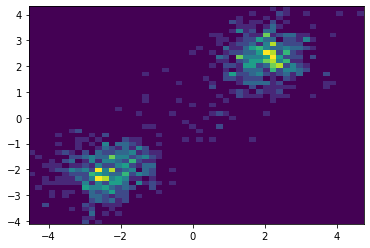

epoch: 40
[ 78 / 79 ]  Disc Loss:  6.195377349853516  Gen Loss:  -3.096393585205078


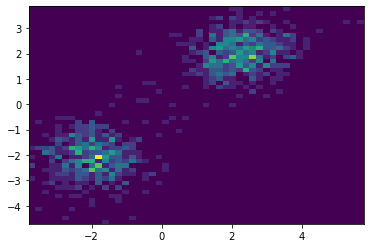

epoch: 60
[ 78 / 79 ]  Disc Loss:  6.2166876792907715  Gen Loss:  -3.0954742431640625


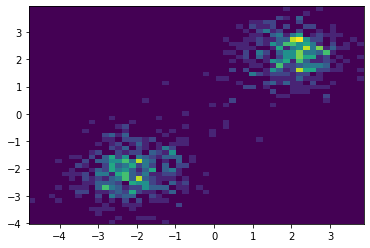

epoch: 80
[ 78 / 79 ]  Disc Loss:  6.207977294921875  Gen Loss:  -3.117598533630371


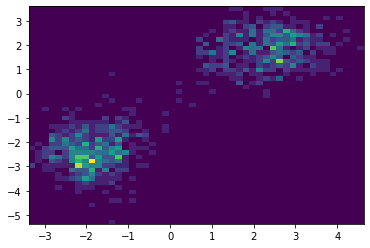

epoch: 100
[ 78 / 79 ]  Disc Loss:  6.255354404449463  Gen Loss:  -3.1371915340423584


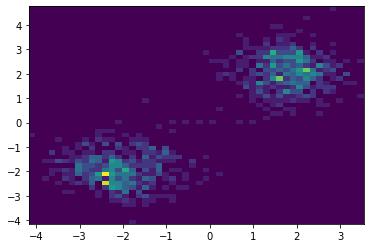

KeyboardInterrupt: ignored

In [19]:
train.train()

# 4 Mode

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([10000, 2])


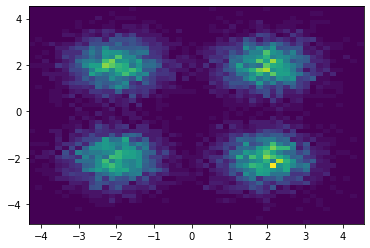

In [21]:
mu = torch.Tensor(
    [[ 2, 2],
     [-2,-2],
     [-2, 2],
     [ 2,-2]]
)
sigma = torch.Tensor(
    [[[0.5, 0.  ],
      [0.  , 0.5]],
     [[0.5, 0.  ],
      [0.  , 0.5]],
     [[0.5, 0.  ],
      [0.  , 0.5]],
     [[0.5, 0.  ],
      [0.  , 0.5]]]
)

gaus = D.Independent(D.MultivariateNormal(mu,sigma),0)
c_weight = D.Categorical(torch.tensor(torch.ones(4)))
target = gausMixture = D.MixtureSameFamily(c_weight,gaus)

samples = torch.zeros(10000,2)#target.rsample(torch.Size([10000]))
for i in range(10000):
    samples[i] = target.sample()

print(samples.shape)
plt.hist2d(samples[:,0].numpy(),samples[:,1].numpy(),50)
plt.show()

In [22]:
Gen = generator()
Dis = disc_mixture()

batch_size = 128
lr = 0.0002
goptim = optim.Adam(Gen.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#
doptim = optim.Adam(Dis.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#

# Load data
train_loader = DataLoader(samples, batch_size=batch_size, shuffle=True)


train = MixtureSimplexTrainTogether(
    epochs          = 500,
    goptim          =goptim,
    doptim          =doptim,
    generator       = Gen, 
    discriminator   = Dis, 
    dataloader      = train_loader,
    latentdim       = (2,),

    disc_dimension  =4,   # paper = 9
    sigma_scale     =0.25 # paper

)

Optimization terminated successfully.
         Current function value: 2.424254
         Iterations: 74
         Function evaluations: 143


epoch: 20
[ 78 / 79 ]  Disc Loss:  6.214109897613525  Gen Loss:  -3.114569664001465


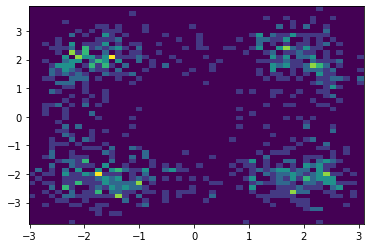

epoch: 40
[ 78 / 79 ]  Disc Loss:  6.320878982543945  Gen Loss:  -3.081056594848633


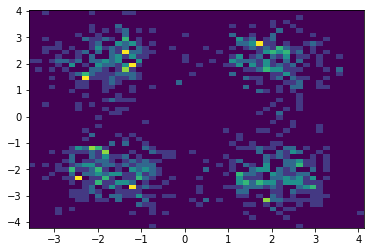

epoch: 60
[ 78 / 79 ]  Disc Loss:  6.265949249267578  Gen Loss:  -3.0736277103424072


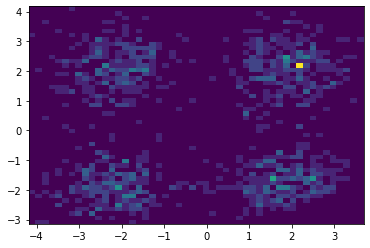

epoch: 80
[ 78 / 79 ]  Disc Loss:  6.220104217529297  Gen Loss:  -3.119981050491333


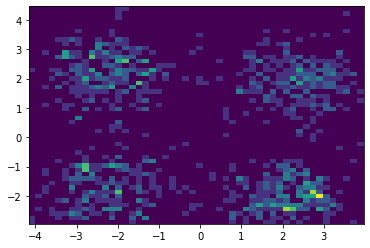

KeyboardInterrupt: ignored

In [23]:
train.train()

# Disformed 4 Mode

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([10000, 2])


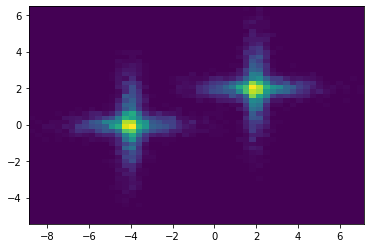

In [33]:
mu = torch.Tensor(
    [[ 2, 2],
     [ 2, 2],
     [-4, 0],
     [-4, 0]]
)
sigma = torch.Tensor(
    [[[2   , 0.  ],
      [0.  , 0.1]],
     [[0.1 , 0.  ],
      [0.  , 2]],
     [[2   , 0.  ],
      [0.  , 0.1]],
     [[0.1 , 0.  ],
      [0.  , 2]]]
)

gaus = D.Independent(D.MultivariateNormal(mu,sigma),0)
c_weight = D.Categorical(torch.tensor(torch.ones(4)))
target = gausMixture = D.MixtureSameFamily(c_weight,gaus)

samples = torch.zeros(10000,2)#target.rsample(torch.Size([10000]))
for i in range(10000):
    samples[i] = target.sample()

print(samples.shape)
plt.hist2d(samples[:,0].numpy(),samples[:,1].numpy(),50)
plt.show()

In [34]:
Gen = generator()
Dis = disc_mixture()

batch_size = 128
lr = 0.0002
goptim = optim.Adam(Gen.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#
doptim = optim.Adam(Dis.parameters(), lr=lr, betas=(0.5, 0.999)) # betas=(0,0.9))#

# Load data
train_loader = DataLoader(samples, batch_size=batch_size, shuffle=True)


train = MixtureSimplexTrainTogether(
    epochs          = 500,
    goptim          =goptim,
    doptim          =doptim,
    generator       = Gen, 
    discriminator   = Dis, 
    dataloader      = train_loader,
    latentdim       = (2,),

    disc_dimension  =4,   # paper = 9
    sigma_scale     =0.25 # paper

)

Optimization terminated successfully.
         Current function value: 2.424254
         Iterations: 74
         Function evaluations: 143


epoch: 20
[ 78 / 79 ]  Disc Loss:  6.121646404266357  Gen Loss:  -3.2903480529785156


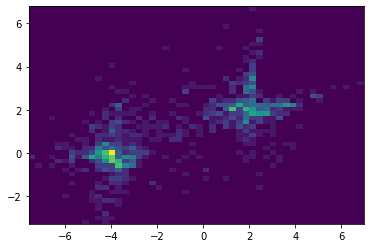

epoch: 40
[ 78 / 79 ]  Disc Loss:  6.158257484436035  Gen Loss:  -3.114471673965454


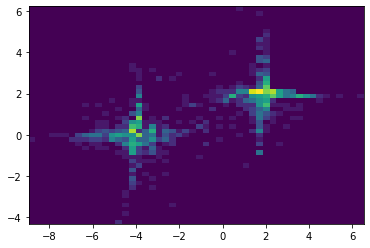

epoch: 60
[ 78 / 79 ]  Disc Loss:  6.23376989364624  Gen Loss:  -3.095370292663574


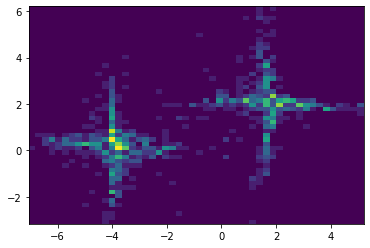

epoch: 80
[ 78 / 79 ]  Disc Loss:  6.229574203491211  Gen Loss:  -3.1356987953186035


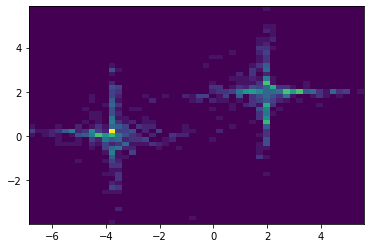

KeyboardInterrupt: ignored

In [35]:
train.train()

# 25 Mode